In [1]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

In [2]:
# STep 2: Load Dataset
df = pd.read_csv("Churn_Modelling.csv")


In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Step 3: Remove unneccessiry columns
df = df.drop(['RowNumber','CustomerId','Surname'], axis = 1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
#Step 4: Encode categorical variables

# df['Geography'].unique()

df['Geography'] = df['Geography'].map({'France':0, 'Germany':1, 'Spain':2})
df['Gender'] = df['Gender'].map({'Female':0,'Male':1})

In [6]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [7]:
# Step 5: Split the data into train and test
X = df.drop('Exited', axis = 1)
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [8]:
# Step 6: Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Step 7: Neural N/W

#to create an empty neural n/w model - like an empty brain
model = tf.keras.Sequential()

# Adding layers to the model to process the data and make predictions

model.add(tf.keras.layers.Dense(6, activation = 'relu', input_shape = (10,))) # First layer = 6 neurons, takes 10 inputs, activation = relu
model.add(tf.keras.layers.Dense(6, activation = 'relu')) # Second layer = 6 neurons, activation = relu
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid')) # O/P layer = 1 neuron, activation = Sigmoid

/opt/homebrew/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
#Step 8: Compile the model: tell the model how to learn
"""
Optimiser helps the model to learn and converge. Loss function tells us to measure how much we are off from the actual value, and for binary 
outcome, binary cross entropy is suitable. Metrics in the case of classification can be accuracy.
"""

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [73]:
# Step 9: Train the model

history = model.fit(X_train, y_train, epochs = 50, batch_size = 32, validation_data = (X_test, y_test))

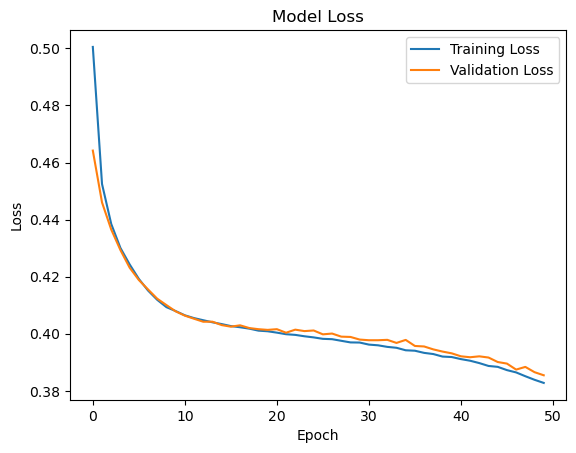

In [12]:
# STep 10: Plot the training results

plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

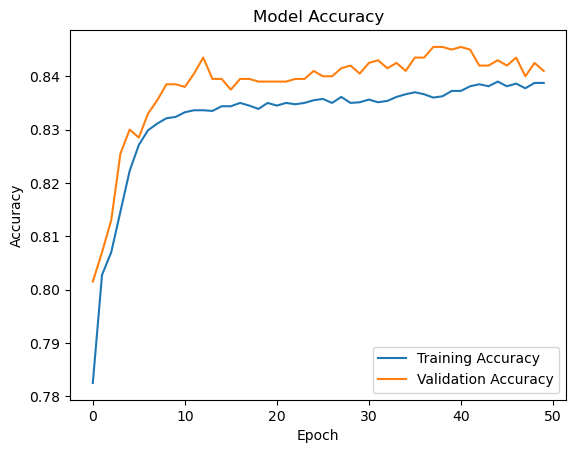

In [13]:
#Plotting Accuracy - how the model's accuracy is changing wrt epoch progress
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

In [14]:
# STep 11: Predicting for a new customer

#Ask the user for customer details - data
print("Enter customer details to predict if they will leave: ")

credit_score = float(input("Provide credit score (e.g., 700): "))
geography = float(input("Provide Geography (0 for France, 1 for Germany, 2 for Spain): "))
gender = float(input("Gender (0 for Female, 1 for Male): "))
age = float(input("Provide Age (e.g. 35 yrs "))
tenure = float(input("Tenure ( Yrs with bank (e.g., 3 yrs) : "))
balance = float(input("Balance, e.g. 10000: "))
num_products = float(input("Number of Products, e.g. 2: "))
has_cr_card = float(input("has Credit Card? (0 for No, 1 for Yes): "))
is_active =float(input("is active member? (0 for No, 1 for Yes): "))
salary = float(input("Provide Salary (e.g. 15000): "))



Enter customer details to predict if they will leave: 


Provide credit score (e.g., 700):  650
Provide Geography (0 for France, 1 for Germany, 2 for Spain):  1
Gender (0 for Female, 1 for Male):  1
Provide Age (e.g. 35 yrs  35
Tenure ( Yrs with bank (e.g., 3 yrs) :  2
Balance, e.g. 10000:  15000
Number of Products, e.g. 2:  1
has Credit Card? (0 for No, 1 for Yes):  1
is active member? (0 for No, 1 for Yes):  1
Provide Salary (e.g. 15000):  18000


In [15]:
user_input = np.array([[credit_score,geography,gender,age,tenure,balance,num_products,has_cr_card,is_active,salary]])

In [16]:
user_input

array([[6.5e+02, 1.0e+00, 1.0e+00, 3.5e+01, 2.0e+00, 1.5e+04, 1.0e+00,
        1.0e+00, 1.0e+00, 1.8e+04]])

In [17]:
user_input_scaled = scaler.transform(user_input)

/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [18]:
# Step : Prediction
prediction = model.predict(user_input_scaled)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([[0.05129446]], dtype=float32)

In [19]:
chance = prediction[0][0]

if chance > 0.5:
    result = "will likely leave"
    explanation = f"The model is saying that there is a {chance*100:.1f}% chance that the customer will leave. Since this is over 50%, they are predicted to be exiting."
    # print(result)

else:
    result = "will likely stay"
    explanation = f"The model is saying that there is a {chance*100:.1f}% chance that the customer will stay. Since this is below 50%, they are predicted to be staying."


print(f"Prediction: The customer {result}")
print(explanation)

Prediction: The customer will likely stay
The model is saying that there is a 5.1% chance that the customer will stay. Since this is below 50%, they are predicted to be staying.


In [20]:
# #Step : Visualising the NN:

# from tensorflow.keras.utils import plot_model
# plot_model(model, to_file='model_plot.png', show_shapes = True, show_layer_names = True)

### Section 2: Implementation of Early Stopping, Batch Normalisation and Dropout.

In [71]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping

In [77]:
# Define early stopping
# monitor = Monitor validation loss, patience = It allows the training to continue for n epochs after the last improvement in val_loss, 
# restore_best weights = When training stops, at that time model's weight is reverted to those from the epoch with lowest val_loss (best model)

early_stop = EarlyStopping(monitor = 'val_loss', patience = 5,restore_best_weights = True)

In [79]:
enhanced_model = Sequential()

In [81]:
# I/P layer + Hidden layer 1

enhanced_model.add(Dense(128, activation = 'relu', input_shape = (10,)))
enhanced_model.add(BatchNormalization())
enhanced_model.add(Dropout(0.3))

/opt/homebrew/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [83]:
# Hidden layer 2
enhanced_model.add(Dense(64, activation = 'relu')) 
enhanced_model.add(BatchNormalization())
enhanced_model.add(Dropout(0.3))

In [85]:
#O/P Layer
enhanced_model.add(Dense(1, activation = 'sigmoid')) 

In [87]:
#Compile the model
enhanced_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [89]:
new_history = enhanced_model.fit(X_train, y_train, epochs = 50, batch_size = 32, validation_data = (X_test, y_test), callbacks = [early_stop], verbose=1)

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - accuracy: 0.6417 - loss: 0.6830 - val_accuracy: 0.8365 - val_loss: 0.3971
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - accuracy: 0.7959 - loss: 0.4598 - val_accuracy: 0.8550 - val_loss: 0.3571
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.8278 - loss: 0.4087 - val_accuracy: 0.8655 - val_loss: 0.3492
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - accuracy: 0.8342 - loss: 0.3878 - val_accuracy: 0.8645 - val_loss: 0.3475
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.8399 - loss: 0.3781 - val_accuracy: 0.8660 - val_loss: 0.3455
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - accuracy: 0.8415 - loss: 0.3835 - val_accuracy: 0.8620 - val_loss: 0.3443
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - accuracy: 0.8418 - loss: 0.3735 - val_accuracy: 0.8585 - val_loss: 0.3480
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - accuracy: 0.8449 - loss: 0.3698 - 

In [93]:
#Predict on the test set
y_pred_new = enhanced_model.predict(X_test)
y_pred_new = (y_pred_new > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step


In [95]:
#Evaluate on the test set
loss, Accuracy = enhanced_model.evaluate(X_test, y_test)
print("Test Accuracy after BN + DO + ES: {:.2f}%".format(accuracy * 100))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - accuracy: 0.8565 - loss: 0.3259
Test Accuracy after BN + DO + ES: 84.10%


In [ ]:
"""

1. Findout the accuracy before BN, DO and ES and then compare with the current accuracy
2. Tune hyperparameters of the model.

"""

In [107]:
"""
Hyperparameters:

1. Number of layers: model's layers (determine the complexity of model)
2. learning rate - control step size for weight updates during optimization.
3. batch size - number of samples processed before weight update.
4. number of epochs - number of times the the entire dataset is passed through the n/w.
5. number of neuron - number of individual neurons in each layer
6. optimizer - Algorithm for updating the weights. e.g. - Adam, RMSProp, sgd
7. activation function - Introduces non linearity to the neurons. e.g.: relu, sigmoid, tanh, softmax
8. dropout rate - fraction of neurons dropped at the time of training
9. loss function - binary_crossentropy, mean_squared_error
10. early stopping: patience
11. Weight initialisation: method of weight initialisation. e.g. 'glorot_uniform', 'he_normal'





"""

"\nHyperparameters:\n\n1. Number of layers: model's layers (determine the complexity of model)\n2. learning rate - control step size for weight updates during optimization.\n3. batch size - number of samples processed before weight update.\n4. number of epochs - number of times the the entire dataset is passed through the n/w.\n5. number of neuron - number of individual neurons in each layer\n6. optimizer - Algorithm for updating the weights. e.g. - Adam, RMSProp, sgd\n7. activation function - Introduces non linearity to the neurons. e.g.: relu, sigmoid, tanh, softmax\n8. dropout rate - fraction of neurons dropped at the time of training\n9. loss function - binary_crossentropy, mean_squared_error\n10. early stopping: patience\n11. Weight initialisation: method of weight initialisation. e.g. 'glorot_uniform', 'he_normal'\n\n\n\n\n\n"